# Parcial 1
Septiembre 30 - 2023

## EDA - Fraud Detection

In [1]:
import pandas as pd
df = pd.read_csv('train_transaction_new.csv')


In [2]:
df2 = pd.read_csv('train_identity_new.csv')

In [3]:
print(df.head())

   TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
0        2987000        0          86400            68.5         W  13926   
1        2987001        0          86401            29.0         W   2755   
2        2987002        0          86469            59.0         W   4663   
3        2987003        0          86499            50.0         W  18132   
4        2987004        0          86506            50.0         H   4497   

   card2  card3       card4  card5  ... V330  V331  V332  V333  V334 V335  \
0    NaN  150.0    discover  142.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
1  404.0  150.0  mastercard  102.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
2  490.0  150.0        visa  166.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
3  567.0  150.0  mastercard  117.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
4  514.0  150.0  mastercard  102.0  ...  0.0   0.0   0.0   0.0   0.0  0.0   

  V336  V337  V338  V339  
0  NaN   NaN   NaN   NaN  
1  NaN   NaN   NaN  

In [4]:
print(df2.head())

   TransactionID  id_01     id_02  id_03  id_04  id_05  id_06  id_07  id_08  \
0        2987004    0.0   70787.0    NaN    NaN    NaN    NaN    NaN    NaN   
1        2987008   -5.0   98945.0    NaN    NaN    0.0   -5.0    NaN    NaN   
2        2987010   -5.0  191631.0    0.0    0.0    0.0    0.0    NaN    NaN   
3        2987011   -5.0  221832.0    NaN    NaN    0.0   -6.0    NaN    NaN   
4        2987016    0.0    7460.0    0.0    0.0    1.0    0.0    NaN    NaN   

   id_09  ...                id_31  id_32      id_33           id_34  id_35  \
0    NaN  ...  samsung browser 6.2   32.0  2220x1080  match_status:2      T   
1    NaN  ...   mobile safari 11.0   32.0   1334x750  match_status:1      T   
2    0.0  ...          chrome 62.0    NaN        NaN             NaN      F   
3    NaN  ...          chrome 62.0    NaN        NaN             NaN      F   
4    0.0  ...          chrome 62.0   24.0   1280x800  match_status:2      T   

  id_36 id_37  id_38  DeviceType                  

In [5]:
df3 = pd.merge(df, df2, on ='TransactionID', how = 'left') 

In [6]:
print(df3)

       TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
0            2987000        0          86400          68.500         W  13926   
1            2987001        0          86401          29.000         W   2755   
2            2987002        0          86469          59.000         W   4663   
3            2987003        0          86499          50.000         W  18132   
4            2987004        0          86506          50.000         H   4497   
...              ...      ...            ...             ...       ...    ...   
99994        3086994        0        2005980          97.000         W  14290   
99995        3086995        0        2005989          55.385         C   2256   
99996        3086996        0        2006074         117.000         W   2518   
99997        3086997        0        2006135          50.000         S   2748   
99998        3086998        0        2006177         100.000         H  16075   

       card2  card3       c

In [7]:
#Visualizamos las primeras líneas de nuestro dataset
df3.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


Observamos que hay columnas cuyos datos se encuentran vacíos, por lo que es pertinente realizar ciertas modificaciones a la base de datos más adelante. 

In [8]:
#Valores incluidos en la categoría
df3.isFraud.value_counts()

isFraud
0    97438
1     2561
Name: count, dtype: int64

Donde 0 = no es fraude y 1 = sí es fraude.

In [9]:
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt

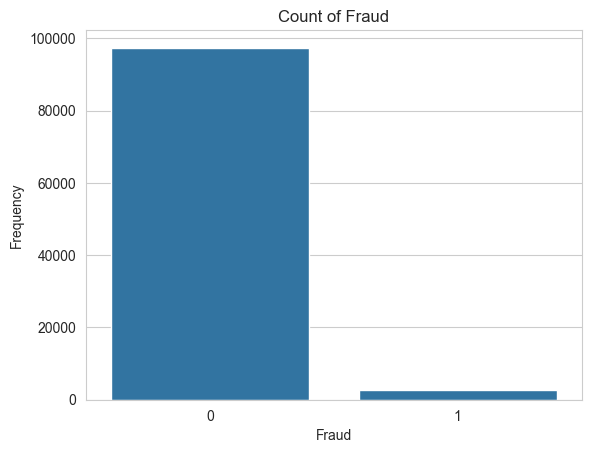

In [10]:
plt.title('Count of Fraud')
sns.countplot(x=df3.isFraud)
plt.xlabel('Fraud')
plt.ylabel('Frequency')
plt.show()

Se identifica entonces que la cantidad de fraude es muy baja, de acuerdo con lo registrado.

In [11]:
#Obtenemos la información de la base de datos
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 434 entries, TransactionID to DeviceInfo
dtypes: float64(399), int64(4), object(31)
memory usage: 331.1+ MB


In [12]:
#Describimos los tipos de variables
df3.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
count,9.999900e+04,99999.00000,9.999900e+04,99999.000000,99999.000000,98645.000000,99996.000000,99474.000000,90962.000000,90962.000000,...,39880.000000,12981.000000,39871.000000,39866.000000,1620.000000,1624.000000,1500.000000,1612.000000,1623.000000,29838.000000
mean,3.036999e+06,0.02561,1.135115e+06,130.743579,9878.453325,370.887972,153.236709,200.072039,291.414239,86.242156,...,178.218029,13.978199,362.550074,383.387975,394.084568,15.523399,13.216667,326.617866,150.661738,26.329647
std,2.886737e+04,0.15797,5.733446e+05,206.025702,4933.557719,159.244484,11.151578,40.905338,103.077427,5.056896,...,25.656110,1.479517,146.488112,155.157082,207.763730,6.056069,2.180113,104.043438,31.061028,3.655790
min,2.987000e+06,0.00000,8.640000e+04,0.292000,1001.000000,100.000000,100.000000,100.000000,100.000000,13.000000,...,100.000000,11.000000,100.000000,100.000000,100.000000,12.000000,11.000000,100.000000,100.000000,0.000000
25%,3.012000e+06,0.00000,6.537475e+05,45.000000,6019.000000,215.000000,150.000000,166.000000,204.000000,87.000000,...,166.000000,13.000000,266.000000,222.000000,252.000000,14.000000,11.000000,272.000000,121.000000,24.000000
50%,3.036999e+06,0.00000,1.189336e+06,75.000000,9653.000000,387.000000,150.000000,226.000000,299.000000,87.000000,...,166.000000,13.000000,352.000000,391.000000,252.000000,14.000000,15.000000,321.000000,150.000000,24.000000
75%,3.061998e+06,0.00000,1.643436e+06,135.950000,14290.000000,514.000000,150.000000,226.000000,330.000000,87.000000,...,166.000000,15.000000,492.000000,521.000000,576.000000,14.000000,15.000000,381.000000,169.000000,32.000000
max,3.086998e+06,1.00000,2.006177e+06,4829.950000,18395.000000,600.000000,229.000000,237.000000,540.000000,102.000000,...,229.000000,29.000000,671.000000,660.000000,853.000000,41.000000,25.000000,548.000000,216.000000,32.000000


Teniendo en cuenta la media y la mediana, en cuanto a la variable *isFraud* se evidencia una distribución normal de los datos, sin sesgos y con una asimetría muy mínima. También, de acuerdo con la información de la tabla, se puede afirmar una distancia entre los valores mínimo y máximo de todas las variables, lo que llevaría a que se deba realizar un escalamiento de los datos.

In [50]:
labels = (df3['isFraud'].value_counts())
labels

isFraud
0    97438
1     2561
Name: count, dtype: int64

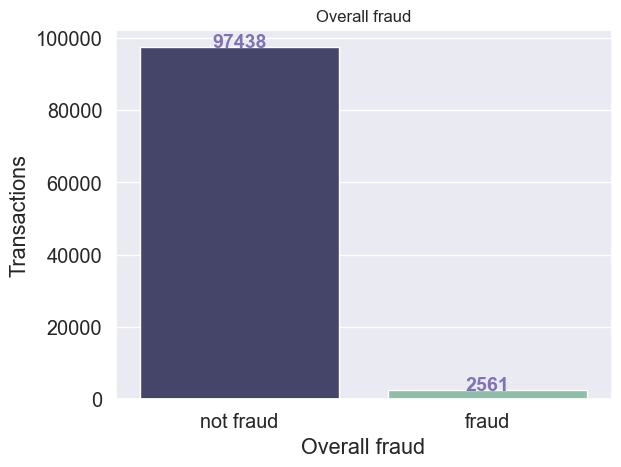

In [51]:
ax = sns.countplot(x = 'isFraud', data = df3, palette=["#3f3e6fd1", "#85c6a9"])
plt.xticks(np.arange(2), ['not fraud', 'fraud'])
plt.title('Overall fraud',fontsize= 12)
plt.xlabel('Overall fraud')
plt.ylabel('Transactions');

for i, v in enumerate(labels):
    ax.text(i, v-40, str(v), horizontalalignment = 'center', size = 14, color = 'm', fontweight = 'bold');

In [52]:
df3['isFraud'].value_counts(normalize = True)

isFraud
0    0.97439
1    0.02561
Name: proportion, dtype: float64

Dentro del conjunto de datos, encontramos que de las *99.999* transacciones, el *97* (97438) no son fraudulentas, mientras que el *2,56%* (2561) sí lo son.

In [13]:
import warnings
warnings.filterwarnings('ignore')
import mglearn
import matplotlib

In [15]:
#Revisamos los NA de la base de datos
train_NA = df3.isna().sum()
print(train_NA)

TransactionID         0
isFraud               0
TransactionDT         0
TransactionAmt        0
ProductCD             0
                  ...  
id_36             59598
id_37             59598
id_38             59598
DeviceType        59716
DeviceInfo        63534
Length: 434, dtype: int64


Encontramos que 5 de las columnas tienen muchos datos faltantes. Por lo que se implementa la siguiente función:

In [16]:
from sklearn.impute import SimpleImputer

In [17]:
print(df3.values)

[[2987000 0 86400 ... nan nan nan]
 [2987001 0 86401 ... nan nan nan]
 [2987002 0 86469 ... nan nan nan]
 ...
 [3086996 0 2006074 ... nan nan nan]
 [3086997 0 2006135 ... 'T' 'desktop' 'MacOS']
 [3086998 0 2006177 ... 'T' 'desktop' 'MacOS']]


In [18]:
imp = SimpleImputer(strategy="most_frequent")
print(imp.fit_transform(df3))

[[2987000 0 86400 ... 'T' 'desktop' 'Windows']
 [2987001 0 86401 ... 'T' 'desktop' 'Windows']
 [2987002 0 86469 ... 'T' 'desktop' 'Windows']
 ...
 [3086996 0 2006074 ... 'T' 'desktop' 'Windows']
 [3086997 0 2006135 ... 'T' 'desktop' 'MacOS']
 [3086998 0 2006177 ... 'T' 'desktop' 'MacOS']]


## EDA - Wind Speed

In [19]:
import pandas as pd
wind = pd.read_csv('data_treino_dv_df_2000_2010.csv')

In [20]:
wind.head()

,HORA (UTC),"VENTO, DIREï¿½ï¿½O HORARIA (gr) (ï¿½ (gr))","VENTO, VELOCIDADE HORARIA (m/s)",UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),TEMPERATURA Mï¿½XIMA NA HORA ANT. (AUT) (ï¿½C),TEMPERATURA Mï¿½NIMA NA HORA ANT. (AUT) (ï¿½C),"UMIDADE RELATIVA DO AR, HORARIA (%)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)","PRECIPITAï¿½ï¿½O TOTAL, HORï¿½RIO (mm)","VENTO, RAJADA MAXIMA (m/s)",PRESSï¿½O ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSï¿½O ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)
0,12:00,0.809017,1.8,69.0,60.0,22.6,20.7,61.0,888.2,0.0,3.8,888.2,887.7
1,13:00,0.965926,2.7,62.0,55.0,24.2,22.5,55.0,888.4,0.0,4.7,888.4,888.2
2,14:00,0.891007,2.0,56.0,50.0,25.5,24.3,51.0,888.1,0.0,4.9,888.4,888.1
3,15:00,0.848048,2.5,52.0,44.0,27.4,25.0,44.0,887.4,0.0,5.8,888.1,887.4
4,16:00,0.224951,2.4,50.0,43.0,27.1,25.5,46.0,886.5,0.0,5.8,887.4,886.5


Para mayor facilidad, se deben renombrar los nombres de las columnas. Por lo tanto:

In [21]:
print(wind.columns)

Index(['HORA (UTC)', 'VENTO, DIREï¿½ï¿½O HORARIA (gr) (ï¿½ (gr))',
       'VENTO, VELOCIDADE HORARIA (m/s)',
       'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)',
       'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)',
       'TEMPERATURA Mï¿½XIMA NA HORA ANT. (AUT) (ï¿½C)',
       'TEMPERATURA Mï¿½NIMA NA HORA ANT. (AUT) (ï¿½C)',
       'UMIDADE RELATIVA DO AR, HORARIA (%)',
       'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)',
       'PRECIPITAï¿½ï¿½O TOTAL, HORï¿½RIO (mm)', 'VENTO, RAJADA MAXIMA (m/s)',
       'PRESSï¿½O ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)',
       'PRESSï¿½O ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)'],
      dtype='object')


In [22]:
#Cambiamos el nombre de las columnas:

wind = wind.rename (columns = {'HORA (UTC)': 'Hora(UTC)', 'VENTO, DIREï¿½ï¿½O HORARIA (gr) (ï¿½ (gr))': 'DireccionHoraria', 'VENTO, VELOCIDADE HORARIA (m/s)': 'VelocidadHoraria', 'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)': 'HumedadRelMax', 'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)': 'HumedadRelMin', 'TEMPERATURA Mï¿½XIMA NA HORA ANT. (AUT) (ï¿½C)': 'TempMax',  'TEMPERATURA Mï¿½NIMA NA HORA ANT. (AUT) (ï¿½C)': 'TempMin', 'UMIDADE RELATIVA DO AR, HORARIA (%)': 'HumedadRel',  'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)': 'PresionAtm', 'PRECIPITAï¿½ï¿½O TOTAL, HORï¿½RIO (mm)': 'PrecipitacionPorH', 'VENTO, RAJADA MAXIMA (m/s)': 'MaxRafagaViento', 'PRESSï¿½O ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)': 'PresionAtmMax', 'PRESSï¿½O ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)': 'PresionAtmMin'   } )
wind.columns

Index(['Hora(UTC)', 'DireccionHoraria', 'VelocidadHoraria', 'HumedadRelMax',
       'HumedadRelMin', 'TempMax', 'TempMin', 'HumedadRel', 'PresionAtm',
       'PrecipitacionPorH', 'MaxRafagaViento', 'PresionAtmMax',
       'PresionAtmMin'],
      dtype='object')

In [23]:
wind.head()

,Hora(UTC),DireccionHoraria,VelocidadHoraria,HumedadRelMax,HumedadRelMin,TempMax,TempMin,HumedadRel,PresionAtm,PrecipitacionPorH,MaxRafagaViento,PresionAtmMax,PresionAtmMin
0,12:00,0.809017,1.8,69.0,60.0,22.6,20.7,61.0,888.2,0.0,3.8,888.2,887.7
1,13:00,0.965926,2.7,62.0,55.0,24.2,22.5,55.0,888.4,0.0,4.7,888.4,888.2
2,14:00,0.891007,2.0,56.0,50.0,25.5,24.3,51.0,888.1,0.0,4.9,888.4,888.1
3,15:00,0.848048,2.5,52.0,44.0,27.4,25.0,44.0,887.4,0.0,5.8,888.1,887.4
4,16:00,0.224951,2.4,50.0,43.0,27.1,25.5,46.0,886.5,0.0,5.8,887.4,886.5


In [24]:
wind.describe()

,DireccionHoraria,VelocidadHoraria,HumedadRelMax,HumedadRelMin,TempMax,TempMin,HumedadRel,PresionAtm,PrecipitacionPorH,MaxRafagaViento,PresionAtmMax,PresionAtmMin
count,87693.000000,87693.000000,87693.000000,87693.000000,87693.000000,87693.000000,87693.000000,87693.000000,87693.000000,87693.000000,87693.000000,87693.000000
mean,0.405810,2.466192,69.058465,63.176194,21.921264,20.684570,66.146682,887.251925,0.160907,5.161076,887.580724,886.891093
std,0.686247,1.313968,19.640222,20.166336,3.721386,3.513744,19.992327,4.012404,1.307515,2.311157,3.646750,3.564539
min,-1.000000,0.000000,12.000000,10.000000,9.200000,8.400000,10.000000,863.400000,0.000000,0.000000,865.300000,862.800000
25%,-0.156434,1.500000,54.000000,48.000000,19.200000,18.400000,51.000000,885.300000,0.000000,3.400000,885.600000,885.000000
50%,0.788011,2.400000,72.000000,64.000000,21.400000,20.200000,68.000000,887.200000,0.000000,5.000000,887.500000,886.900000
75%,0.970296,3.400000,87.000000,80.000000,24.700000,23.100000,84.000000,889.100000,0.000000,6.800000,889.300000,888.800000
max,1.000000,10.000000,100.000000,98.000000,35.300000,34.400000,99.000000,1023.500000,70.800000,24.300000,913.100000,910.900000


Se evidencia, de acuerdo con la media y la mediana de *VelocidadHoraria*, no existen sesgos ni asimetrías. Por otro lado, teniendo en cuenta la distancia entre los valores mínimos y máximos de todas las variables, se debe realizar un escalamieno de los datos. 

In [25]:
wind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87693 entries, 0 to 87692
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Hora(UTC)          87693 non-null  object 
 1   DireccionHoraria   87693 non-null  float64
 2   VelocidadHoraria   87693 non-null  float64
 3   HumedadRelMax      87693 non-null  float64
 4   HumedadRelMin      87693 non-null  float64
 5   TempMax            87693 non-null  float64
 6   TempMin            87693 non-null  float64
 7   HumedadRel         87693 non-null  float64
 8   PresionAtm         87693 non-null  float64
 9   PrecipitacionPorH  87693 non-null  float64
 10  MaxRafagaViento    87693 non-null  float64
 11  PresionAtmMax      87693 non-null  float64
 12  PresionAtmMin      87693 non-null  float64
dtypes: float64(12), object(1)
memory usage: 8.7+ MB


In [26]:
#Revisamos los NA de la base de datos
train_NA = wind.isna().sum()
print(train_NA)

Hora(UTC)            0
DireccionHoraria     0
VelocidadHoraria     0
HumedadRelMax        0
HumedadRelMin        0
TempMax              0
TempMin              0
HumedadRel           0
PresionAtm           0
PrecipitacionPorH    0
MaxRafagaViento      0
PresionAtmMax        0
PresionAtmMin        0
dtype: int64


In [27]:
(wind.isnull().sum()/(len(wind)))*100

Hora(UTC)            0.0
DireccionHoraria     0.0
VelocidadHoraria     0.0
HumedadRelMax        0.0
HumedadRelMin        0.0
TempMax              0.0
TempMin              0.0
HumedadRel           0.0
PresionAtm           0.0
PrecipitacionPorH    0.0
MaxRafagaViento      0.0
PresionAtmMax        0.0
PresionAtmMin        0.0
dtype: float64

Todas las columnas cuentan con información suministrada, por lo que no hay valores faltantes que imputar.

In [28]:
#Realizamos la prueba para ver si hay correlación entre las variables:
corr = wind.iloc[: , 1:].corr()
corr.shape

(12, 12)

In [30]:
import numpy as np
matplotlib.rc_file_defaults()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

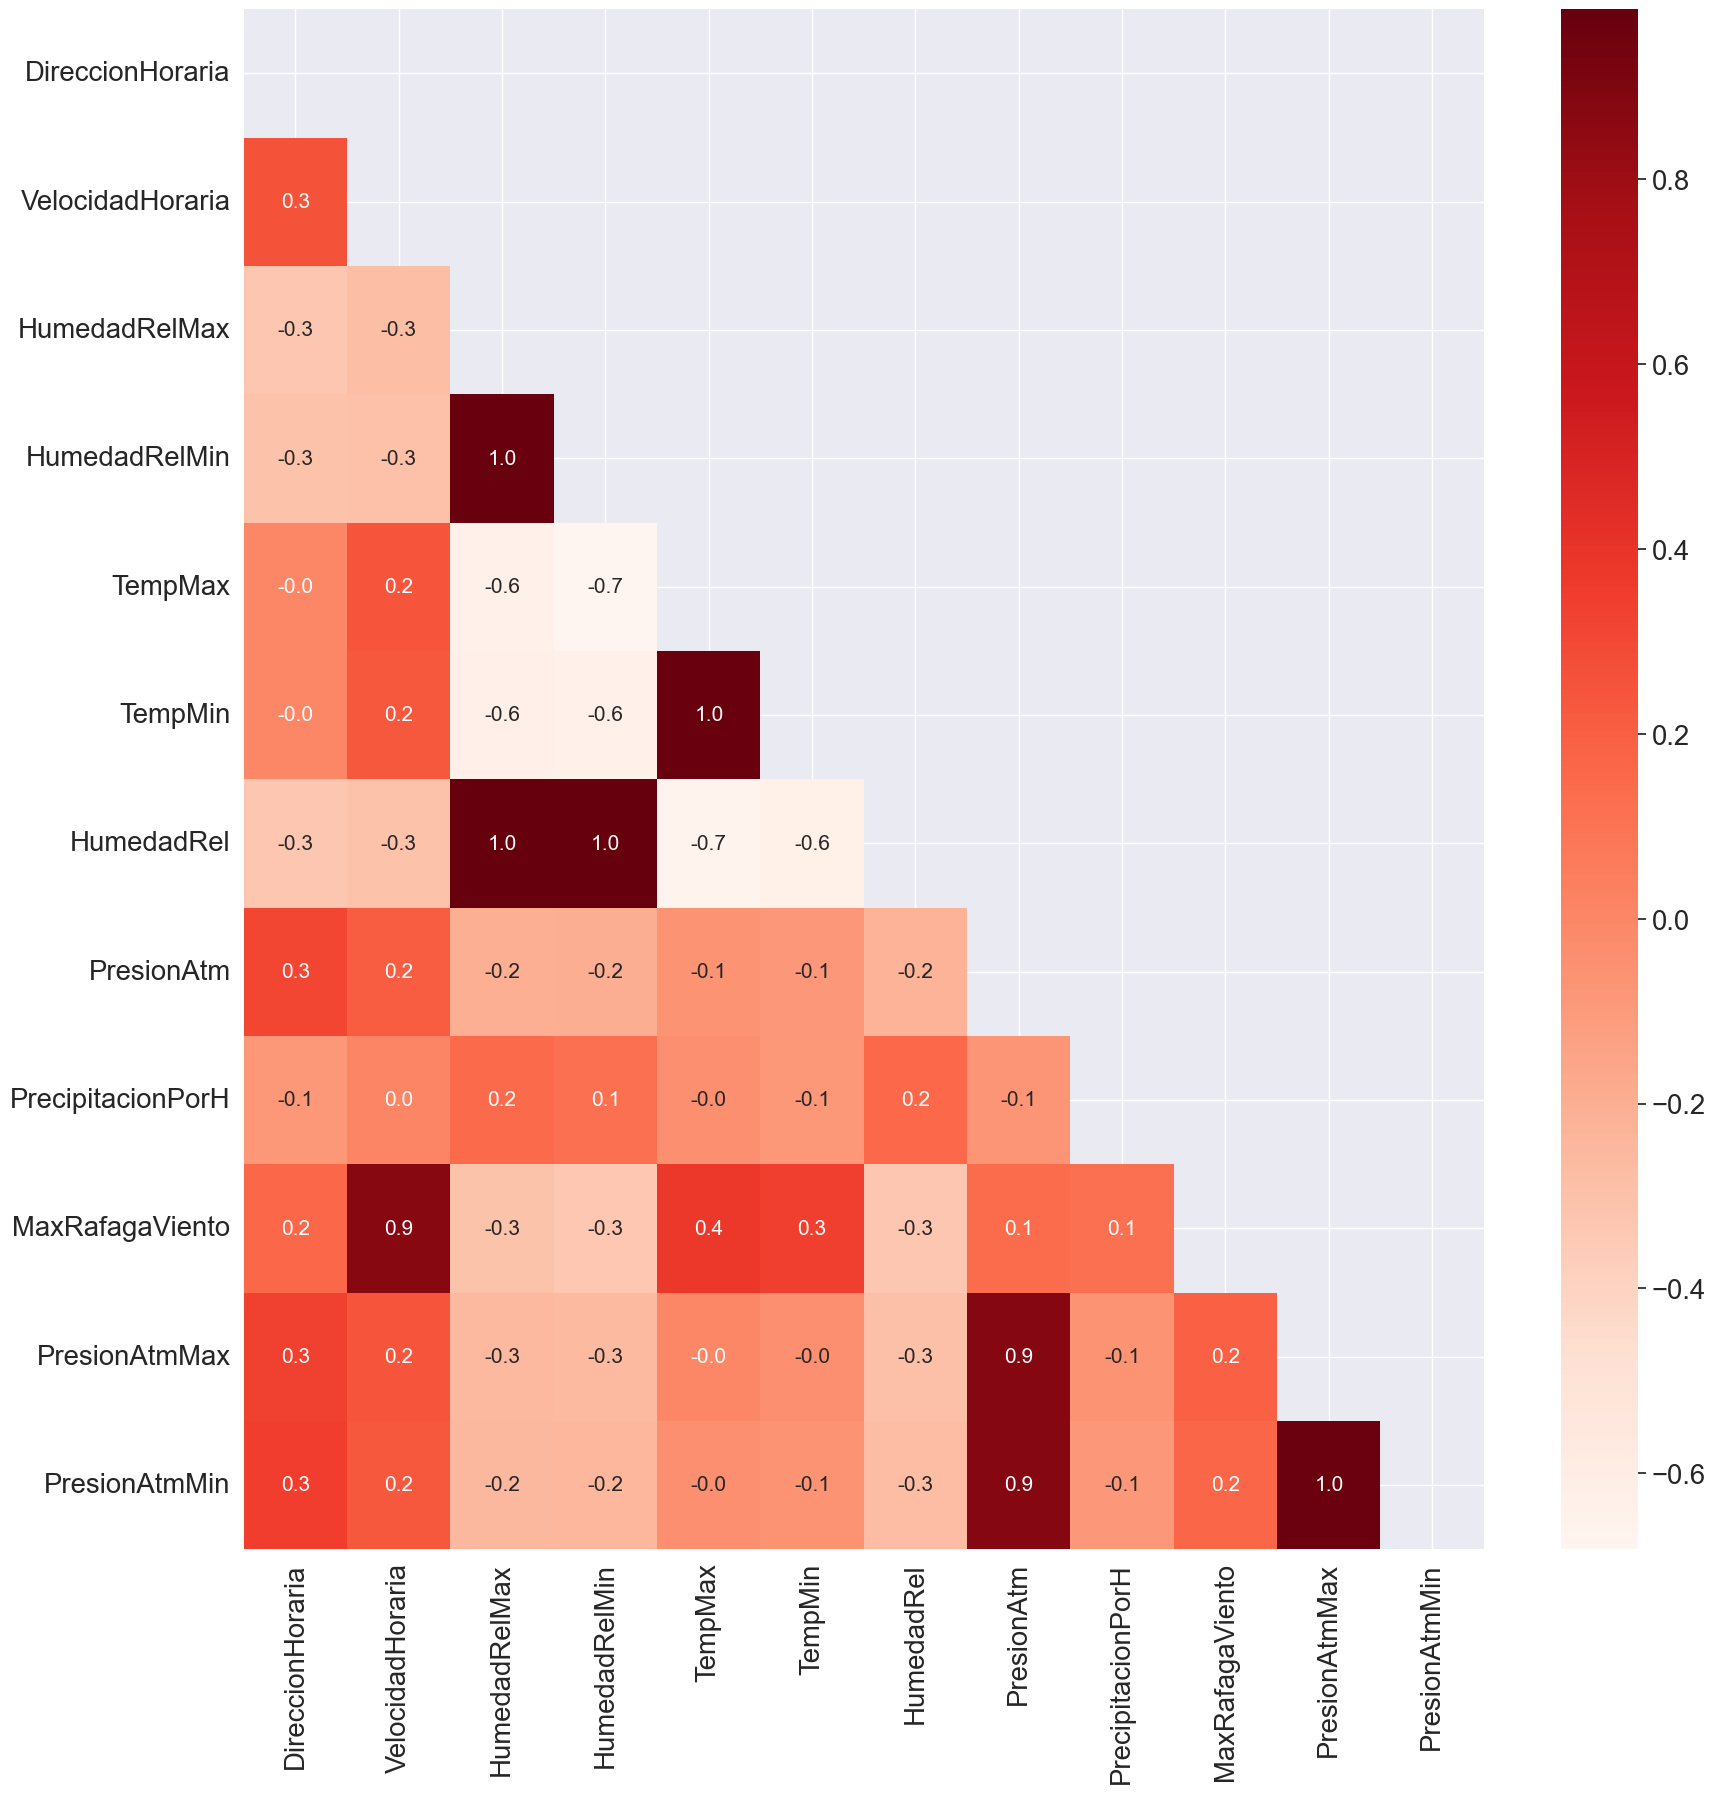

In [33]:
sns.set(font_scale=1.8)
plt.figure(figsize=(20,20))
sns.heatmap(corr, mask=mask, cbar=True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Reds');

In [37]:
#Utilizamos la variable VIF como condición para eliminar las columnas altamente correlacionadas.
from statsmodels.stats.outliers_influence import variance_inflation_factor

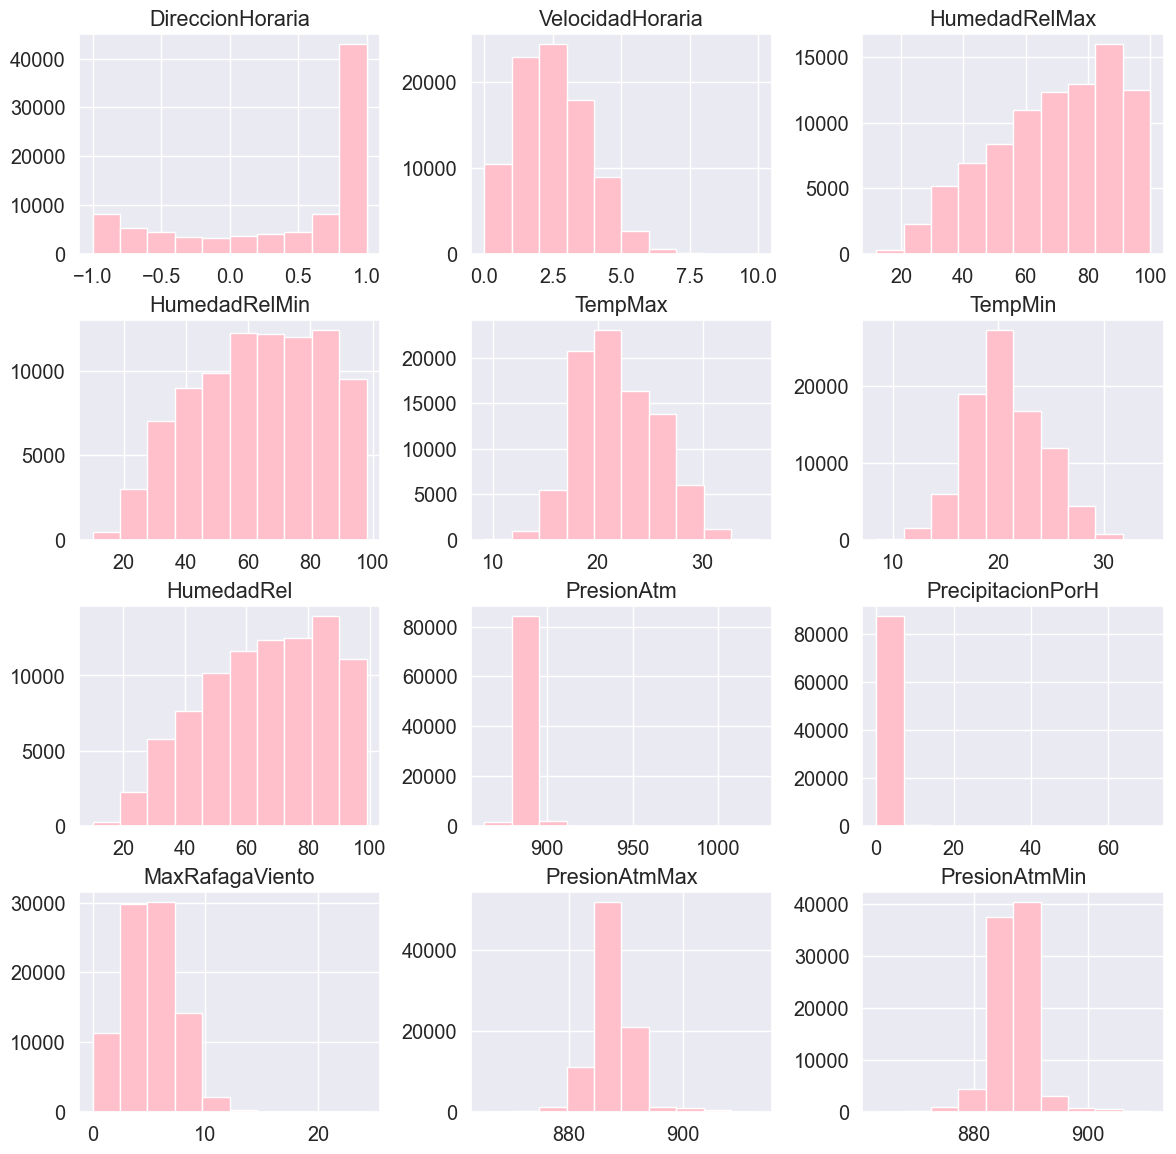

In [36]:
sns.set(font_scale=1.3)
wind.iloc[: , 1:].hist(figsize = (14,14), color = 'pink');

En estos histogramas se evidencia la asimetría en la distribución de nuestros datos.

## Modelo de Clasificación